In [1]:
import matplotlib
%matplotlib inline

import numpy as np, matplotlib as mpl
import PreFRBLE
from PreFRBLE.convenience import *
from PreFRBLE.plot import *
from PreFRBLE.likelihood import *
from PreFRBLE.physics import *

from time import time
from tqdm import tqdm

In [2]:
scenario = {
    'IGM' : ['primordial'],
    'Host' : ['Rodrigues18/smd'],
    'Inter' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
}

scenario0 = {
    'IGM' : ['alpha3-3rd'],
    'Host' : ['Rodrigues18/smd'],
    'Inter' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
}

scenario_tmp = {
    'IGM' : ['primordial'],
    'Host' : ['Rodrigues18/smd'],
    'Inter' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
}

scenario1 = {
    'IGM' : ['primordial'],
    'Host' : ['Rodrigues18/smd'],
#    'Inter' : ['Rodrigues18'],
    'Local' : ['Piro18/wind'],
}



In [13]:

with h5.File( likelihood_file_Full, 'r' ) as f:
    print( f.keys())
    print( f['alpha1-3rd/Rodrigues18/Rodrigues18/smd/Piro18/wind/0.1'].keys())
    print( f['primordial/Rodrigues18/Rodrigues18/smd/Piro18/wind/5.0'].keys())
    
scenario_tmp['IGM'] = models_IGMF[0] 
print( len(GetLikelihood_Full( redshift=0.1, measure='RM',  **scenario_tmp ) ) )

<KeysViewHDF5 ['alpha1-3rd', 'primordial']>
<KeysViewHDF5 ['RM']>
<KeysViewHDF5 ['DM', 'SM', 'tau']>
2


compute likelihood of measure in full scenario for individual source redshifts. Takes a long time to compute all the convolutions. Results are saved to likelihood_file_Full and loaded faster later on.

In [4]:
models_IGMF = [  ## first, test with limited set of IGMF models
    'alpha1-3rd',
    'alpha3-3rd',
    'alpha9-3rd',
]

ComputeFullLikelihood( scenario=scenario, models_IGMF=models_IGMF, N_processes=3)

alpha1-3rd 0.2
alpha1-3rd 1.2000000000000002
alpha1-3rd 0.2
alpha1-3rd 1.2000000000000002
alpha1-3rd 0.7000000000000001
alpha1-3rd 0.7000000000000001


Process ForkPoolWorker-9:
Traceback (most recent call last):
  File "/usr/lib/python3.4/multiprocessing/process.py", line 254, in _bootstrap
    self.run()
Process ForkPoolWorker-8:
Process ForkPoolWorker-7:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.4/multiprocessing/process.py", line 254, in _bootstrap
    self.run()
  File "/usr/lib/python3.4/multiprocessing/process.py", line 254, in _bootstrap
    self.run()
  File "/usr/lib/python3.4/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.4/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.4/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.4/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python3.4/multiprocessing/pool.py", line 119, i

KeyboardInterrupt: 

alpha1-3rd 3.1
alpha1-3rd 3.1
alpha1-3rd 3.2
alpha1-3rd 3.2



  0%|          | 0/60 [00:00<?, ?it/s]/data/PreFRBLE/PreFRBLE_venv/lib/python3.4/site-packages/PreFRBLE/likelihood.py:455: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  P = f[ KeyFull( measure=measure, axis='P', redshift=redshift, **scenario ) ].value
/data/PreFRBLE/PreFRBLE_venv/lib/python3.4/site-packages/PreFRBLE/likelihood.py:456: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  x = f[ KeyFull( measure=measure, axis='x', redshift=redshift, **scenario ) ].value

  3%|▎         | 2/60 [00:00<00:03, 16.62it/s]/data/PreFRBLE/PreFRBLE_venv/lib/python3.4/site-packages/PreFRBLE/likelihood.py:385: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  P = f[ KeyIGM( redshift=redshift, model=model, typ=typ, nside=nside, measure='|%s|' % measure if absolute else measure, axis='P' ) ].value
/data/PreFRBLE/PreFRBLE_venv/lib/python3.4/site-packages/PreFRBLE/likelihood.py:386: H5pyDepreca

KeyboardInterrupt: 

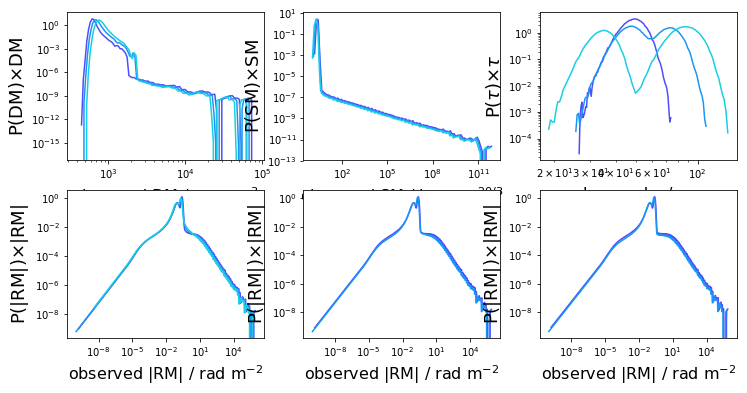

In [18]:
### here we plot the results

fig, axs = plt.subplots(2,3, figsize=(12,6))

msrs = measures[:]
msrs.remove('RM')

t0 = time()
colors = rainbow(redshift_bins)

for i_z in tqdm( range( redshift_bins.size ) ):
    zs, color = redshift_bins[i_z], colors[i_z]
#for zs, color in zip( redshift_bins, rainbow(redshift_bins) ):
    for im, measure in enumerate(msrs):
        P, x = GetLikelihood_Full( redshift=zs, measure=measure, **scenario )
        PlotLikelihood(P=P, x=x, ax=axs[0][im], measure=measure, color=color )
    for ia, a in enumerate([1,3,9]):
        tmp = scenario.copy()
        tmp['IGM'] = ['alpha%i-3rd' % a]
        P, x = GetLikelihood_Full( redshift=zs, measure='RM', **tmp )
        PlotLikelihood(P=P, x=x, ax=axs[1][ia], measure='RM', color=color )

Colorbar( redshift_bins, label='redshift', ax=axs[0][-1])
Colorbar( redshift_bins, label='redshift', ax=axs[1][-1])
        
print( "this took %.1f minutes" % ( (time()-t0) / 60 ) )
        

compute likelihood of model contribution as observed by telescope

In [ ]:
## what should be plotted?
measures = ['DM', 'RM', 'tau']
#telescopes = ['chime','askap-fly','parkes']
#populations = ['vol_co','smd','sfr']


## which models to plot?
models = [
    { 'Local':['Piro18/wind']},
    { 'Local':['Piro18/uniform/Rodrigues18']},
    { 'Host':['Rodrigues18/smd']},
    { 'Inter':['Rodrigues18']},
    { 'IGM' : ['primordial']},
]


## which IGM models to compare?
scenarios_IGMF = [
    { 'IGM' : ['alpha1-3rd']},
    { 'IGM' : ['alpha3-3rd']},
    { 'IGM' : ['alpha9-3rd']},
]

handles = []
for population, linestyle in zip( populations, linestyle_population ):
    handles.append( plt.plot( [0,1],[0,1], label=population, color='black', linestyle=linestyle )[0] )

for telescope, color in zip( telescopes, color_telescopes ):
    handles.append( plt.plot( [0,1],[0,1], label=telescope, color=color )[0] )

plt.legend()
plt.clf()

fig, axs = plt.subplots( len(models) , len(measures), figsize=(4*len(measures), 3*len(models) ), sharex='col', sharey='all' )

for i_m, model in enumerate( models ):
    for ax in axs[i_m]:
        ax.set_title( '/'.join( KeyFull( **model ).split('/')[:-3] ), fontsize=16 )
    for i_v, measure in enumerate( measures ):
        for population, linestyle in zip( populations, linestyle_populations):
            for telescope, color in zip( telescopes, color_telescopes):
                PlotTelescope( measure=measure, population=population, telescope=telescope, ax=axs[i_m][i_v], scenario=model, linestyle=linestyle, color=color )

axs[0][0].set_ylim(1e-5,3)
axs[0][1].legend( handles, populations+telescopes, loc='lower left', bbox_to_anchor= (-0.6, 1.12), ncol=2, borderaxespad=0, frameon=False, fontsize=16 )

## to show ticks despite sharex and sharey
for ax in axs.flat:
    ax.xaxis.set_tick_params(labelbottom=True, labelsize=16, )
    ax.yaxis.set_tick_params( which='both', labelbottom=True, labelsize=16, )

plt.tight_layout()
plt.show()

fig, axs = plt.subplots( len( scenarios_IGMF ), 1, figsize=( 4,len( scenarios_IGMF )* 3 ), sharex='all', sharey='all' )

for i_m, model in enumerate( scenarios_IGMF ):
    axs[i_m].set_title( r"$\alpha$ = %s/3" % model['IGM'][0].split('-')[0][-1], fontsize=16 )
    for population, linestyle in zip( populations, linestyle_populations ):
        for telescope, color in zip( telescopes, color_telescopes ):
            PlotTelescope( measure='RM', ax=axs[i_m], scenario=model, linestyle=linestyle, color=color  )

axs[0].legend( handles, populations+telescopes, loc='lower left', bbox_to_anchor= (-0.6, 1.12), ncol=2, borderaxespad=0, frameon=False, fontsize=16 )
axs[0].set_ylim(1e-5,3)

## to show ticks despite sharex and sharey
for ax in axs.flat:
    ax.xaxis.set_tick_params(labelbottom=True, labelsize=16, )
    ax.yaxis.set_tick_params( which='both', labelbottom=True, labelsize=16, )

plt.tight_layout()
plt.show()




compuite likelihood of measure in full scenario as observed by telescope

In [ ]:
measures = ['DM', 'tau']
telescope = 'Parkes'
population = 'SMD'
fig, axs = plt.subplots( 1, len(measures), figsize=(4*len(measures),3) )

t0 = time()
for i_m, measure in enumerate( measures ):
    P, x = GetLikelihood_Telescope(measure=measure, telescope=telescope, population=population, **scenario )
    PlotLikelihood( x, P, measure=measure, ax=axs[i_m] )
for ax in axs:
    ax.set_ylim(1e-5,2)
plt.tight_layout()
print "this took %.1f minutes" % ( (time()-t0)/60 )

In [ ]:

## which full scenarios to plot for IGMF?
alphas = np.array(models_IGM)[np.array([3,5,-1])]
scenarios = []
for alpha in alphas:
    scenario_tmp['IGM'] = [alpha]
    scenarios.append( scenario_tmp.copy() )
    

fig, axs = plt.subplots( len( scenarios ), 1, figsize=( 4,len( scenarios )* 3 ), sharex='all', sharey='all' )
for i_s, scenario in enumerate(scenarios):
    axs[i_s].set_title( '/'.join( KeyFull( **scenario ).split('/')[:-3] ), fontsize=16 )
    for population, linestyle in zip( populations, linestyle_populations):
        for telescope, color in zip( telescopes, color_telescopes):
            PlotTelescope( measure='RM', population=population, telescope=telescope, ax=axs[i_s], scenario=scenario, linestyle=linestyle, color=color )


axs[0].legend( handles, populations+telescopes, loc='lower left', bbox_to_anchor= (-0.6, 1.12), ncol=2, borderaxespad=0, frameon=False, fontsize=16 )
axs[0].set_ylim(1e-5,3)

## to show ticks despite sharex and sharey
for ax in axs.flat:
    ax.xaxis.set_tick_params(labelbottom=True, labelsize=16, )
    ax.yaxis.set_tick_params( which='both', labelbottom=True, labelsize=16, )

plt.tight_layout()
plt.show()


compute redshift estimates

In [ ]:
### first compare DM estimates assuming different cosmic population 

FRBs = GetFRBcat()

N_FRBs = len(FRBs)

fig, axs = plt.subplots( N_FRBs, 1, figsize=(4, 3*N_FRBS) )

z_estdev = np.zeros( N_FRBs, len(populations), 2 )-1  ## result array to contain estimate and deviation of redshift for each population  \\ and for population independent

for tele, color in zip( telescopes, color_telescopes):
    ## find FRBs observed by tele
    ix_tele = np.where( FRBs['tele'] == telescopes_FRBcat[tele] )
    set = FRBs[ ix_tele ]
    for ipop, (pop, linestyle) in enumerate( zip( populations, linestyle_populations ) ):
        Ps, z = LikelihoodRedshift( set['DM']-set['DM_gal'], scenario, telescope=tele, population=pop )
        for iP, P in enumerate(Ps):
            PlotLikelihood( z, P, measure='redshift', log=False, ax=axs[ix_tele[iP]], color=color, linestyle=linestyle )
            z_estdev[ix_tele[iP], ipop+1] = Likelihood2Expectation( P, z, log=False )

with open( file_redshifts_DM, 'w' ) as f:
    f.write( R"\begin{tabular}{l|c|c|c|c|c|c}" )
    f.write( "\n\t")
    f.write( R"ID & $\DMobs$ / $\unitDM$  & $\DMMW$ / $\unitDM$ & $z_{\rm SMD}(\DM)$  & $z_{\rm SFR}(\DM)$ & $z_{\rm coV}(\DM)$ \\" )
#    f.write( R"ID & $\DMobs$ / $\unitDM$  & $\DMMW$ / $\unitDM$ & $z_{\rm flat}(\DM)$  & $z_{\rm vol\_co}(\DM)$  & $z_{\rm smd}(\DM)$ & $z_{\rm sfr}(\DM)$ \\" )

    for frb, estdev in zip( FRBs, z_estdev ):
        if z_estdev[0] == -1:
            continue
        f.write( "\n\t")
        f.write( R"%s & %.1f & %.1f & $%.2f \pm %.2f$ & $%.2f \pm %.2f$ & $%.2f \pm %.2f$ \\" % ( frb['ID'].decode('UTF-8'), frb['DM'], frb['DM_gal']), estdev[0][0], estdev[0][1], estdev[1][0], estdev[1][1], estdev[2][0], estdev[2][1] ) )
    f.write( "\n")
    f.write( R"\end{tabular}" )
        
            
for ax, id in zip( axs, FRBs['ID'] ):
    ax.set_title( id )



In [ ]:
    
### investigate how additional info from tau refines results


## file creation template
f = open( file_redshifts_DM_tau, 'w' )
    f.write( R"\begin{tabular}{l|c|c|c|c|c|c}" )
    f.write( "\n\t")
    f.write( R"ID & $\DMobs$ / $\unitDM$  & $\DMMW$ / $\unitDM$ & $\tau$ / ms & $z_{\rm vol\_co}(\DM,\tau)$  & $z_{\rm smd}(\DM,\tau)$ & $z_{\rm sfr}(\DM,\tau)$ \\" )
    for i in [1,2]:
        f.write( "\n\t")
        f.write( R"FRB123456 & 1000 & 10 & 1 & $1.00 \pm 0.10$ & $1.00 \pm 0.10$ & $1.00 \pm 0.10$ \\" )
    f.write( "\n")
    f.write( R"\end{tabular}" )

perform fake-test of IGMF inference

In [3]:
likelihood_file_telescope

'/data/PreFRBLE/likelihood/observables_likelihood_telescope.h5'

In [5]:
with h5.File( likelihood_file_telescope, 'r' )as f:
    print( f['parkes'].keys() )

<KeysViewHDF5 ['smd']>


Here we produce a fake population that mimics observations expected for one of the considered models of IGM. We compute the Bayes factor for each of these models, providing a likelihood function on $\alpha$, the exponent of the $|B| \propto \rho^\alpha$ relation.

alpha1-3rd
[  1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08]
[  1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.

alpha6-3rd
[  1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08]
[  1.00000000e-08   1.00000000e-08   1.00000000e-08   1.00000000e-08
   1.00000000e-08   1.00000000e-08   1.00000000e-08   1.

/media/hqi/bc66589e-7bcd-4650-a007-acbd38d85bc9/virtualenv/crpropa/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


(1e-05, 2)

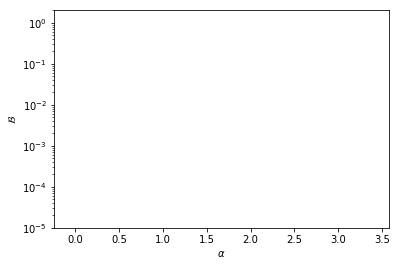

In [3]:
telescope = 'parkes'
population = 'smd'
telescope = 'None'
population = 'flat'

### produce fake data
FRBs = FakeFRBs( measures=['DM','RM'], telescope=telescope, population=population, **scenario )
    
### compute Bayes factor
Bs = []
for model in models_IGM[3:]:
    print model
    scenario_tmp['IGM'] = [model]
    Bs.append( BayesFactorCombined( DMs=FRBs['DM'], RMs=FRBs['RM'], scenario1=scenario_tmp, scenario2=scenario0, population=population, telescope=telescope ) )
Bs = np.array( Bs )
    
### Plot
alphas = np.arange(1,10).astype('float')
#plt.plot( alphas/3, Bs/Bs.max() )
plt.bar( alphas/3, Bs/Bs.max(), color=Rainbow(alphas) )
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\mathcal{B}$")
plt.yscale('log')
plt.ylim(1e-5,2)


In [8]:
with h5.File( likelihood_file_redshift ) as f:
    print f['sfr'].keys()

[u'None', u'apertif', u'askap-fly', u'chime', u'parkes']


Text(0,0.5,u'$\\mathcal{B}/\\mathcal{B}_{\\rm max}$')

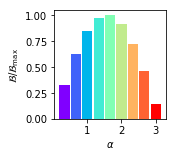

In [8]:
alphas = np.arange(1,10).astype('float')/3
fig, ax = plt.subplots(1,1,figsize=(2,2))
x = alphas
y = np.sin(x)
plt.bar(x, y/y.max(), 0.3, color=Rainbow(x), )
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\mathcal{B}/\mathcal{B}_{\rm max}$")


In [5]:
plt.bar?

Here we compare the contribution of different regions

(0.0001, 10)

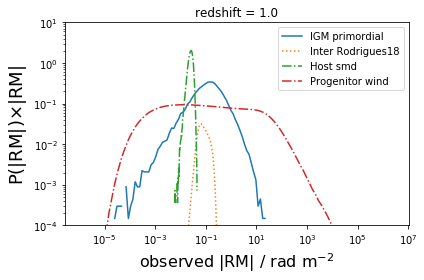

In [4]:
PlotContributions( redshift=1., measure='RM', **scenario0 )
plt.ylim(1e-4,10)

We plot the contributions of individual models to FRB surveys of individual telescopes

<Figure size 432x288 with 0 Axes>

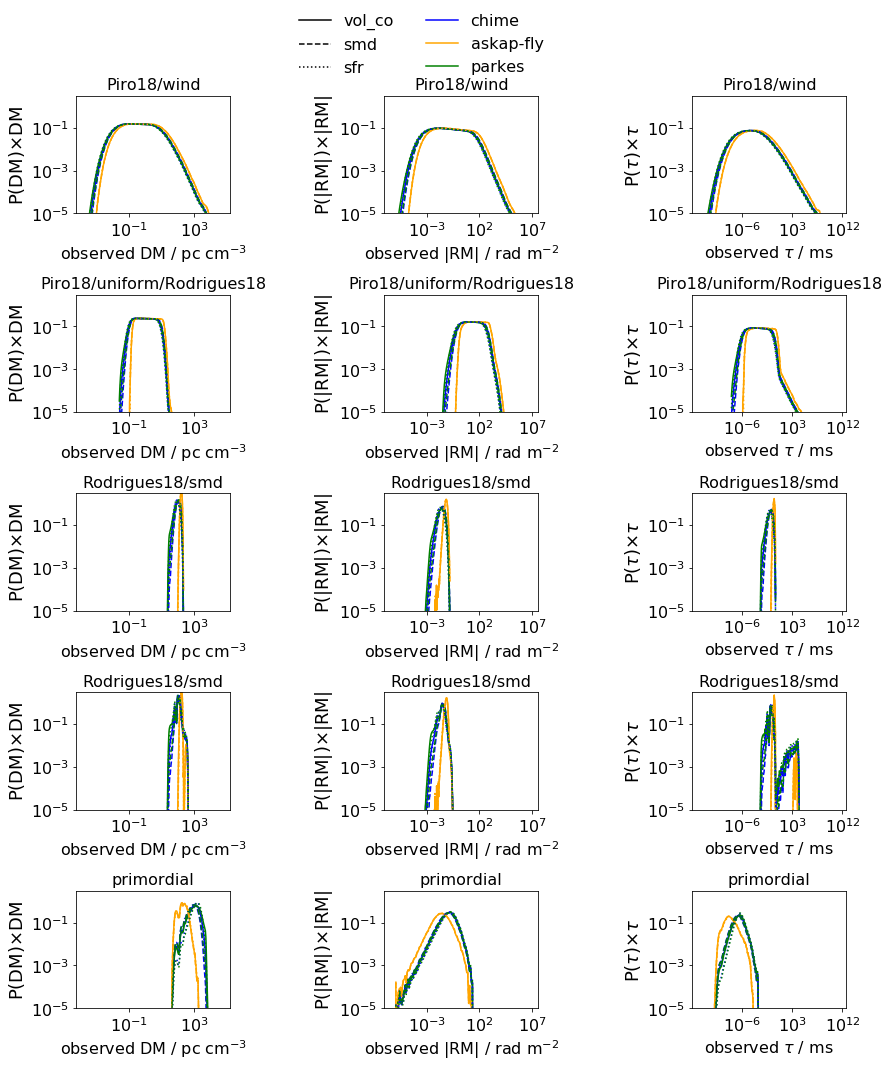

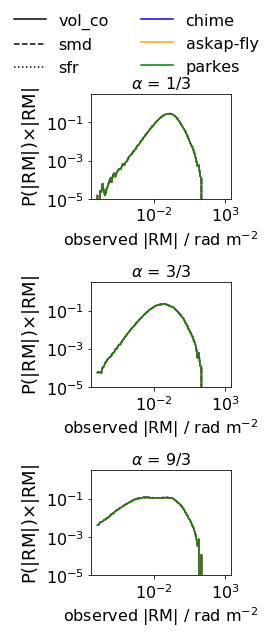

KeyboardInterrupt: 

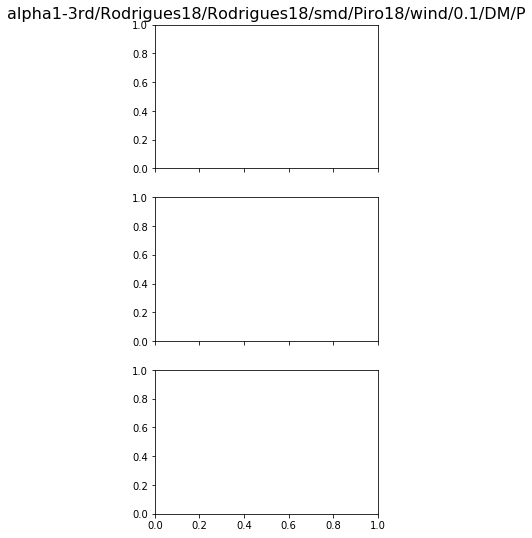

Here, we compute and show FRB measures expected to be observed by telescopes

this took 0.1 minutes


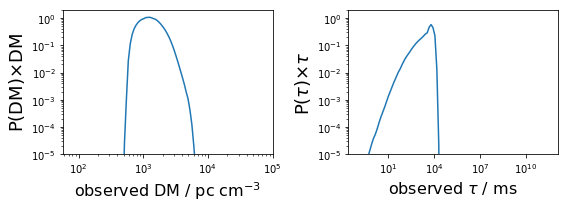

Here, we compute and show the expected measures of FRBs with increasing redshift

this took 0.1 minutes


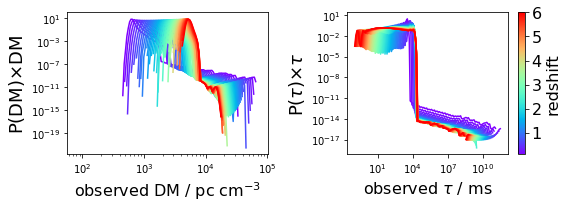

In [3]:
measures = ['DM', 'tau']

fig, axs = plt.subplots( 1, len(measures), figsize=(4*len(measures),3) )

t0 = time()
for i_m, measure in enumerate( measures ):
    for redshift, color in zip(redshift_bins, Rainbow( redshift_bins) ):
        P, x = GetLikelihood_Full(measure=measure, redshift=redshift, **scenario )
        PlotLikelihood( x, P, measure=measure, ax=axs[i_m], color=color )
Colorbar( redshift_bins, label='redshift' )
plt.tight_layout()
print "this took %.1f minutes" % ( (time()-t0)/60 )

In [5]:
likelihood_file_redshift

'/data/PreFRBLE/likelihood/redshift_likelihood.h5'

In [5]:
with h5.File( likelihood_file_redshift ) as f:
    print f['sfr/parkes'].keys()

[u'P', u'x']


In [8]:
FRBs = GetFRBcat( RM=True, tau=True, print_number=True )

3


In [18]:
np.unique(FRBs['tele'])

array(['ASKAP', 'CHIME/FRB', 'DSA-10', 'GBT', 'Pushchino', 'UTMOST',
       'arecibo', 'parkes'],
      dtype='|S10')

Here we estimate the redshift based on DM and see how results can be improved by a) considering a reasonable prior on redshift, b) using $\tau$ also. The redhsift estimates are written into a latex tabular. 

In [ ]:
file_redshifts_DM = "../results/table_redshifts_DM.tex"
file_redshifts_DM_tau = "../results/table_redshifts_DM_tau.tex"

In [95]:
with h5.File( 'test.h5', 'r' ) as f:
    print( f.keys() )
    

<KeysViewHDF5 ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']>


In [94]:
from multiprocessing import Pool
import h5py as h5, os, fcntl
from time import sleep

def f(x):
    #sleep(float(x)/1000)
    with SimpleFlock( 'flock.tmp', 1 ):
        Write2h5(  filename='test.h5', datas=[x], keys=[str(x)] )
    return;

try:
    os.remove( 'test.h5' )
except:
    pass

p = Pool(10)

print( p.map(f, np.arange(100) ) )

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


Acquiring lock...
Lock acquired.
Lock released.


In [70]:
def t(y):
    with SimpleFlock( 'test', 3 ):
        x = open( 'test.text', 'a')
        x.write( 'Hello World %s\n' % str(y) )
        x.flush()
        x.close()

In [75]:
p = Pool(10)

p.map(t, np.arange(100))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]